In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Coordinates of the Aztec Diamond

We will imagine that the Aztec diamond of size $n$ has vertex set,
$$V = \big\{(x,y) : -n \leq x,y \leq n \text{ and } (x+y)\,\%\,2 = 1 \big\}$$
All edges are of the form $e = ((x,y),(x+1,y+1))$ or $e = ((x,y),(x+1,y-1))$. Below, we illustrate the Aztec diamond of size $4$ on coordinate axes. 

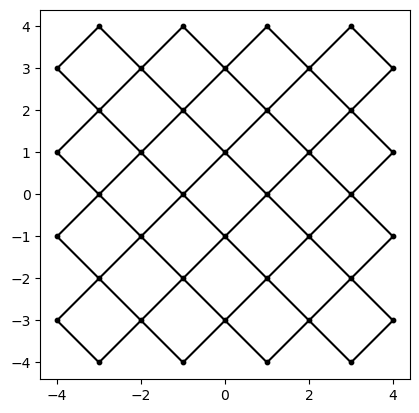

In [2]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for x in [-3,-1,1,3]:
    for y in [-4,-2,0,2,4]:
        ax.scatter(x,y,color='black',s=10)
        ax.scatter(y,x,color='black',s=10)
for y in [-3,-1,1,3]:
    ax.plot([-4,-y],[y,4],color='black')
    ax.plot([y,4],[-4,-y],color='black')
    ax.plot([-4,y],[y,-4],color='black')
    ax.plot([y,4],[4,y],color='black')
plt.show()

## Drawing Tilings

In this document a tiling will be represented by a list of coordinates. If an edge $e$ is in some tiling, then its **midpoint** will appear in the list of coordinates. Below is an example tiling on the size $4$ Aztec diamond,

In [5]:
tiling_example = [(3.5, 3.5),
 (-3.5, -3.5),
 (3.5, 1.5),
 (-1.5, -3.5),
 (-3.5, 3.5),
 (1.5, -1.5),
 (3.5, -0.5),
 (0.5, -3.5),
 (-3.5, 1.5),
 (-0.5, -1.5),
 (-1.5, 3.5),
 (1.5, 0.5),
 (3.5, -2.5),
 (2.5, -3.5),
 (-2.5, -0.5),
 (-3.5, -1.5),
 (0.5, 3.5),
 (1.5, 2.5),
 (-1.5, 1.5),
 (-0.5, 0.5)]

The following code takes a list of tiles and the size of the diamond and draws a tiling. Note that there is a natural way to color the tiles with four different colors, which we do.

In [29]:
def draw_aztec_diamond_tiling(tiles,n):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    # drawing the tiles
    for (x,y) in tiles:
        # first we need to decide what kind of tile it is...
        if ((x + y) % 2 == 0) and ((2*x) % 4 == 1):
            rect1 = patches.Rectangle((x-1/2, y-3/2), 2.828, 1.414, angle=45, linewidth=1, facecolor='blue')
            ax.add_patch(rect1)
        elif ((x + y) % 2 == 0) and ((2*x) % 4 == 3):
            rect2 = patches.Rectangle((x-1/2, y-3/2), 2.828, 1.414, angle=45, linewidth=1, facecolor='yellow')
            ax.add_patch(rect2)
        elif ((x + y) % 2 == 1) and ((2*x) % 4 == 1):
            rect3 = patches.Rectangle((x-3/2, y+1/2), 2.828, 1.414, angle=-45, linewidth=1, facecolor='red')
            ax.add_patch(rect3)
        else:
            rect4 = patches.Rectangle((x-3/2, y+1/2), 2.828, 1.414, angle=-45, linewidth=1, facecolor='green')
            ax.add_patch(rect4)

    ax.set_xlim(-n-1,n+1)
    ax.set_ylim(-n-1, n+1)
    return (fig, ax)

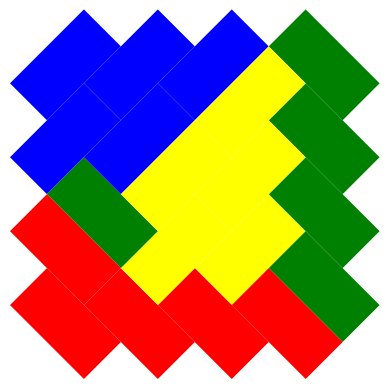

In [31]:
(fig, ax) = draw_aztec_diamond_tiling(tiling_example,4)
plt.show()

## Auxilary Functions

Here we have some auxilary functions which will clean up the domino shuffling algorithm later. We define the following:

* random_square_covering(x,y): Randomly chooses one of the two tilings of the square centered at $(x,y)$. Since we are only dealing with the uniform weights case, each tiling is equally likely.
* replace_element(lst, target, replacement): Replaces the element *target* in the list *lst* with the element *replacement*.
* vertex_covered(x,y,tiles): Returns **True** if the vertex $(x,y)$ is covered in the tiling *tiles*.
* face_empty(x,y,tiles): Returns **True** if all the vertices surrounding the face $(x,y)$ are uncovered. 

In [11]:
def random_square_covering(x,y):
    if np.random.uniform(0,1) < 0.5:
        tile1 = (x-1/2,y+1/2)
        tile2 = (x+1/2,y-1/2)
    else:
        tile1 = (x+1/2,y+1/2)
        tile2 = (x-1/2,y-1/2)
    return [tile1, tile2]

In [13]:
def replace_element(lst, target, replacement):
    return [replacement if x == target else x for x in lst]

In [15]:
def vertex_covered(x,y,tiles): # here (x,y) is the VERTEX coordinate
    covering_edges = [(x+1/2,y+1/2), (x+1/2,y-1/2), (x-1/2,y+1/2), (x-1/2,y-1/2)]
    if any(edge in covering_edges for edge in tiles):
        return True
    else:
        return False

In [17]:
def face_empty(x,y,tiles): # here (x,y) is the face coordinate
    (x1, y1) = (x+1, y)
    (x2, y2) = (x-1, y)
    (x3, y3) = (x, y+1)
    (x4, y4) = (x, y-1)
    if (vertex_covered(x1,y1,tiles) == False) and (vertex_covered(x2,y2,tiles) == False) and (vertex_covered(x3,y3,tiles) == False) and (vertex_covered(x4,y4,tiles) == False):
        return True
    else:
        return False 

## Domino Shuffling Algorithm for the Uniform Aztec Diamond

### Marked Squares

For the Aztec diamond of size $k$, we need to define what are the **marked squares**. The **marked squares** are exactly the faces with coordinates $(x,y)$ such that $x,y \in \{-k+1,-k+3, \dots, k-3, k-1 \}$. Below we show the Aztec diamond of size 4 with the mark squares, 

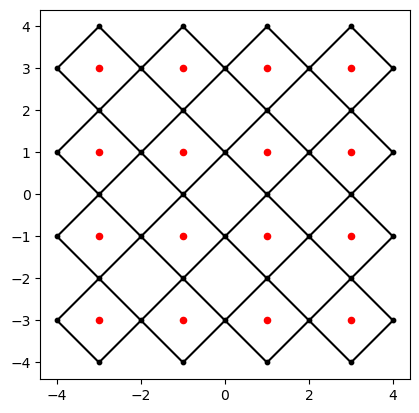

In [19]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for x in [-3,-1,1,3]:
    for y in [-4,-2,0,2,4]:
        ax.scatter(x,y,color='black',s=10)
        ax.scatter(y,x,color='black',s=10)
for y in [-3,-1,1,3]:
    ax.plot([-4,-y],[y,4],color='black')
    ax.plot([y,4],[-4,-y],color='black')
    ax.plot([-4,y],[y,-4],color='black')
    ax.plot([y,4],[4,y],color='black')
for x in [-3,-1,1,3]:
    for y in [-3,-1,1,3]:
        ax.scatter(x,y,color='red',s=20)
plt.show()

### Algorithm Outline

Here we desribe the domino shuffling algorithm for the uniform Aztec diamond. The process is iterative, so we will assume we have a tiling of the size $k-1$ Aztec diamond and use that tiling to generate a tiling of the size $k$ Aztec diamond.

1. Embed the size $k-1$ Aztec diamond in the middle of the size $k$ Aztec diamond. With our choice of coordinates, this embedding is natural (and the coordinates do not need to change).
2. If any marked square has two dominoes, delete them both. This is known as **deletion**.
3. For any marked square with one domino, slide it across the marked square. This is known as **sliding**.
4. A subset of the remaining marked squares uniquely cover the remaining vertices. Randomly pick a covering on each of these squares. This is called **creation**.

Deletion and sliding are pretty straight-forward steps. In fact, we can do them at the same time (since no two marked squares share an edge) by looping over all marked squares. The creation step is a little trickier. We can still loop once over all the marked squares, but we have to do so in a certain order to guarentee that we pick the correct marked squares to generate new tiles on. I'll let the reader think about why the ordering chosen guarentees a tiling. 

Finally, we need to iterate up to the size Aztec diamond we desire. Below, you are free to enter the desired size and it will generate a tiling for you!

#### Notes About Run Time

I did some testing on the time it takes to produce different size Aztec diamonds. The size 80 case takes approximately 2 mins, while the size 100 case takes about 6 mins. Do with that what you will (I'm not a computer scientist lol).

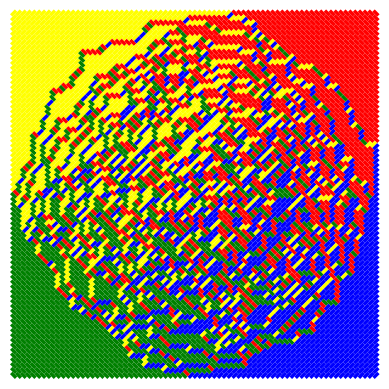

In [49]:
tiles = random_square_covering(0,0)
size = 75
for n in range(2,size+1):
    marked_squares = list(range(-n+1,n,2))
    marked_alt = list(range(n-1,-1,-2))
    # deletion and sliding
    for x in marked_squares:
        for y in marked_squares:
            # first check if the marked square has two dominoes and delet them both
            if ((x-1/2,y+1/2) in tiles) and ((x+1/2,y-1/2) in tiles):
                tiles.remove((x-1/2,y+1/2))
                tiles.remove((x+1/2,y-1/2))
            elif ((x+1/2,y+1/2) in tiles) and ((x-1/2,y-1/2) in tiles):
                tiles.remove((x+1/2,y+1/2))
                tiles.remove((x-1/2,y-1/2))
            # next we check if the marked square only has a single domino and slide it over
            elif (x-1/2,y+1/2) in tiles:
                tiles = replace_element(tiles, (x-1/2,y+1/2), (x+1/2,y-1/2))
            elif (x+1/2,y-1/2) in tiles:
                tiles = replace_element(tiles, (x+1/2,y-1/2), (x-1/2,y+1/2))
            elif (x+1/2,y+1/2) in tiles:
                tiles = replace_element(tiles, (x+1/2,y+1/2), (x-1/2,y-1/2))
            elif (x-1/2,y-1/2) in tiles:
                tiles = replace_element(tiles, (x-1/2,y-1/2), (x+1/2,y+1/2))
    # creation
    for k in marked_alt:
        for j in marked_alt:
            if j == k:
                if j == 0:
                    if face_empty(k,j,tiles) == True:
                        [t1, t2] = random_square_covering(k,j)
                        tiles.append(t1)
                        tiles.append(t2)
                else:
                    if face_empty(k,j,tiles) == True:
                        [t1, t2] = random_square_covering(k,j)
                        tiles.append(t1)
                        tiles.append(t2)
                    if face_empty(k,-j,tiles) == True:
                        [t1, t2] = random_square_covering(k,-j)
                        tiles.append(t1)
                        tiles.append(t2)
                    if face_empty(-k,j,tiles) == True:
                        [t1, t2] = random_square_covering(-k,j)
                        tiles.append(t1)
                        tiles.append(t2)
                    if face_empty(-k,-j,tiles) == True:
                        [t1, t2] = random_square_covering(-k,-j)
                        tiles.append(t1)
                        tiles.append(t2)
            elif j < k:
                if j == 0:
                    for (x,y) in [(k,j), (-k,j), (j,k), (j,-k)]:
                        if face_empty(x,y,tiles) == True:
                            [t1, t2] = random_square_covering(x,y)
                            tiles.append(t1)
                            tiles.append(t2)
                else:
                    for (x,y) in [(k,j), (k,-j), (-k,j), (-k,-j), (j,k), (j,-k), (-j,k), (-j,-k)]:
                        if face_empty(x,y,tiles) == True:
                            [t1, t2] = random_square_covering(x,y)
                            tiles.append(t1)
                            tiles.append(t2)

(fig, ax) = draw_aztec_diamond_tiling(tiles,size)
plt.savefig('AD75_again2.png',bbox_inches='tight')